In [ ]:
# import numpy as np
# import random
# from math import sin, pi
# import csv
# import matplotlib.pyplot as plt

# # Define constants
# g = 9.81  # m/s^2 (gravitational constant)
# L = 1.0  # m (pendulum length)
# dt = 0.01  # s (time step)
# duration = 10.0  # s (oscillation duration)

# # Initial conditions
# theta = 10 * pi / 180  # radians (initial angle)
# omega = 0  # rad/s (initial angular velocity)

# # Generate random noise
# noise_std = 0.1  # rad/s (standard deviation of gyroscope noise)


# def generate_gyroscope_data():
#   """Generates gyroscope readings for the pendulum oscillation.

#   Returns:
#       A list of gyroscope readings (rad/s) for the specified duration.
#   """
#   # Initial conditions
#   theta = 10 * pi / 180  # radians (initial angle)
#   omega = 0  # rad/s (initial angular velocity)
#   gyroscope_data = []
#   t = 0

#   while t < duration:
#     # Update angular acceleration (assuming simple pendulum)
#     alpha = -g * sin(theta) / L

#     # Update angular velocity with noise
#     omega += alpha * dt + random.gauss(0, noise_std)

#     # Update angle
#     theta += omega * dt

#     # Add gyroscope reading to data
#     gyroscope_data.append(omega)

#     # Update time
#     t += dt

#   return gyroscope_data

# # Generate gyroscope data
# gyro_data = generate_gyroscope_data()

# # Ensure data has the same shape (using integer division)
# num_elements = int(duration / dt)  # Calculate desired number of elements
# time_data = np.arange(0, duration, duration / num_elements)

# # Save data to CSV file
# filename = "gyroscope_data.csv"
# with open(filename, "w", newline="") as csvfile:
#   writer = csv.writer(csvfile)
#   writer.writerow(["Time (s)", "Gyroscope (rad/s)"])  # Header row
#   for i, data in enumerate(gyro_data):
#     writer.writerow([time_data[i], data])  # Use time_data corresponding to index

# print(f"Gyroscope data saved to: {filename}")

# # Plot gyroscope data
# plt.plot(time_data, gyro_data)
# plt.xlabel("Time (s)")
# plt.ylabel("Gyroscope (rad/s)")
# plt.title("Gyroscope Readings During Pendulum Oscillation")
# plt.grid(True)
# plt.show()


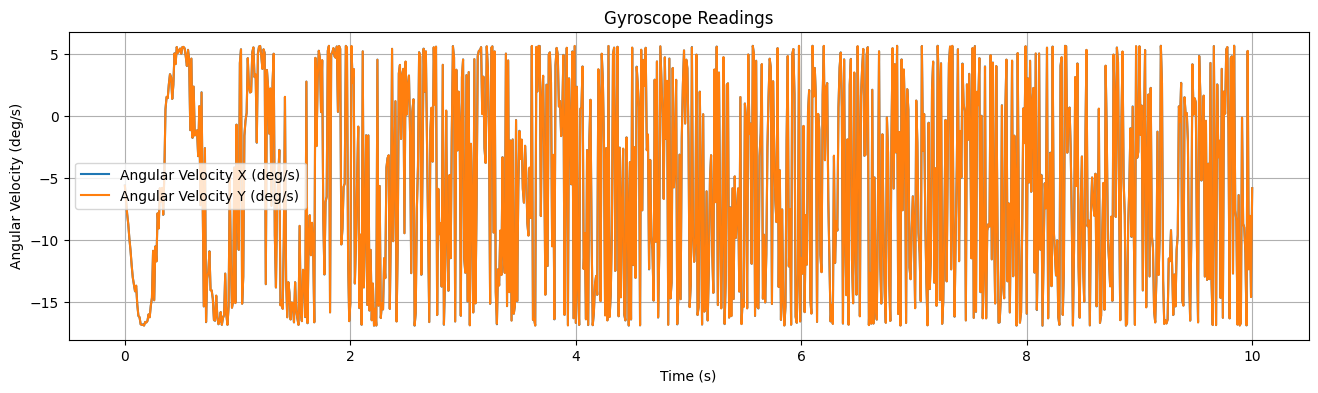

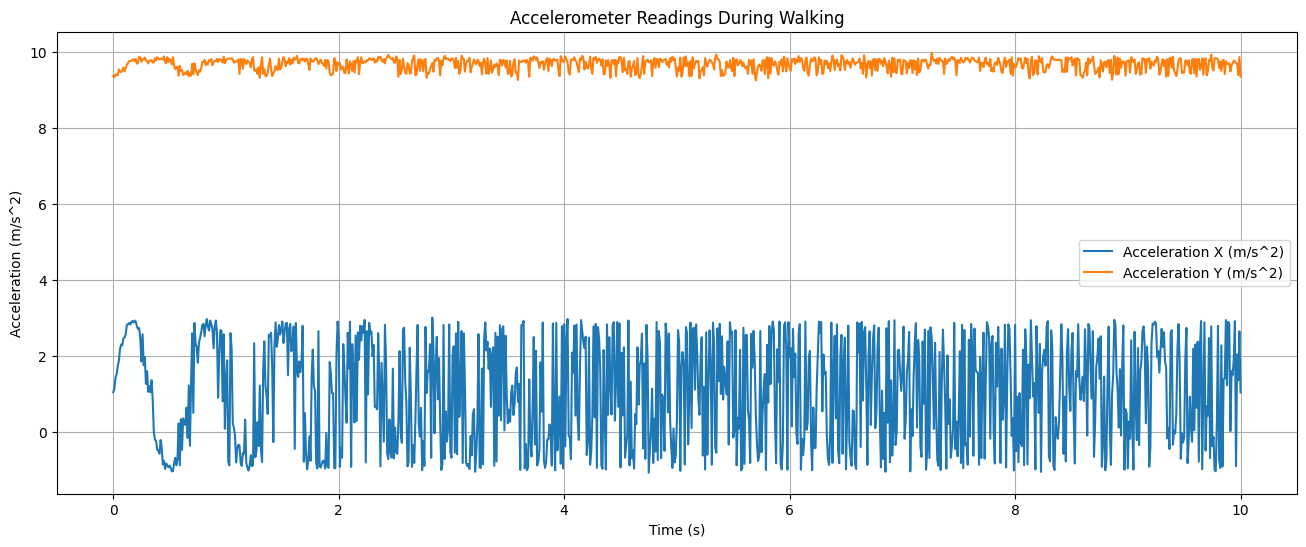

In [ ]:
import numpy as np
import random
from math import sin, cos, pi, degrees
import matplotlib.pyplot as plt

# Define constants
g = 9.81  # m/s^2 (gravitational constant)
dt = 0.01  # s (time step)
duration = 10.0  # s (walking duration)
step_frequency_mean = 1.5  # Hz (average walking frequency)
step_length_mean = 0.5  # m (average step length)
step_frequency_std = 0.1  # Standard deviation of step frequency
step_length_std = 0.05  # Standard deviation of step length
slope_angle = 0.1  # radians (slope angle)

# Random noise
gyro_noise_std = 0.2  # rad/s (reduced standard deviation of gyroscope noise)
accel_noise_std = 0.05  # m/s^2 (reduced standard deviation of accelerometer noise)

# Initialize lists to store data
time_data = []
gyroscope_data = []
accelerometer_data = []

# Generate IMU data
t = 0
while t < duration:
    # Append time data
    time_data.append(t)

    # Calculate step frequency and step length with variability
    step_frequency = random.gauss(step_frequency_mean, step_frequency_std)
    step_length = random.gauss(step_length_mean, step_length_std)

    # Calculate the tilt angle based on a sine wave pattern and slope angle
    step_cycle_progress = (t * step_frequency) % 1
    pelvis_angle_x = 0.2 * sin(2 * pi * step_cycle_progress) + slope_angle
    pelvis_angle_y = 0.2 * cos(2 * pi * step_cycle_progress) + slope_angle

    # Update angular velocities with noise
    pelvis_angular_velocity_x = ((-g * pelvis_angle_x / dt) + random.gauss(0, gyro_noise_std)) * 0.001
    pelvis_angular_velocity_y = ((-g * pelvis_angle_x / dt) + random.gauss(0, gyro_noise_std * 0.1)) * 0.001

    # Convert angular velocities from radians to degrees
    pelvis_angular_velocity_x_deg = degrees(pelvis_angular_velocity_x)
    pelvis_angular_velocity_y_deg = degrees(pelvis_angular_velocity_y)

    # Append gyroscope data
    gyroscope_data.append([pelvis_angular_velocity_x_deg, pelvis_angular_velocity_y_deg])

    # Calculate the linear acceleration along x-axis and y-axis
    pelvis_acceleration_x = g * sin(pelvis_angle_x) + random.gauss(0, accel_noise_std)
    pelvis_acceleration_y = g * cos(pelvis_angle_y) + random.gauss(0, accel_noise_std)

    # Append accelerometer data
    accelerometer_data.append([pelvis_acceleration_x, pelvis_acceleration_y])

    # Update time
    t += dt

# Convert lists to NumPy arrays
time_data = np.array(time_data)
gyroscope_data = np.array(gyroscope_data)
accelerometer_data = np.array(accelerometer_data)

# Plot gyroscope data (angular velocities) in degrees
plt.figure(figsize=(16, 4))  # Set the figure size
plt.plot(time_data, gyroscope_data[:, 0], label="Angular Velocity X (deg/s)")  # X-axis data
plt.plot(time_data, gyroscope_data[:, 1], label="Angular Velocity Y (deg/s)")
plt.xlabel("Time (s)")
plt.ylabel("Angular Velocity (deg/s)")
plt.title("Gyroscope Readings")
plt.legend()  # Add legend for clarity
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot

# Plot accelerometer data
plt.figure(figsize=(16, 6))  # Set the figure size
plt.plot(time_data, accelerometer_data[:, 0], label="Acceleration X (m/s^2)")
plt.plot(time_data, accelerometer_data[:, 1], label="Acceleration Y (m/s^2)")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.title("Accelerometer Readings During Walking")
plt.legend()
plt.grid(True)
plt.show()
